## Imports

In [ ]:
import pandas as pd
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Initialize a dictionary to store performance metrics for two approaches: CAMED and NoCEP.
- Each key represents a metric (CPU, memory, F1-score, accuracy, precision, specificity, recall, false positives) for a specific approach, and its value is an empty list to store data points.

In [18]:

data = {'cpu_CAMED': [], 'cpu_NoCEP': [], 'memory_CAMED': [], 'memory_NoCEP': [], 
        'f1-score_CAMED': [], 'accuracy_CAMED': [], 'precision_CAMED': [], 'specificity_CAMED': [], 'recall_CAMED': [], 'fp_CAMED': [],
        'f1-score_NoCEP': [], 'accuracy_NoCEP': [], 'precision_NoCEP': [], 'specificity_NoCEP': [], 'recall_NoCEP': [], 'fp_NoCEP': []}

## Loading Memory and CPU Metrics
- This section iterates through 30 different runs (from 1 to 30) and two approaches ('NoCEP', 'CAMED') to load and process CPU and memory usage data.

In [19]:
for i in range(1, 31): 
    for approach in ['NoCEP', 'CAMED']:
        cpu_data = pd.read_csv(approach+'/'+str(i)+'.cpu_overall.csv')
        memory_data = pd.read_csv(approach+'/'+str(i)+'.memory_data.csv')
        
        cpu_data['user+sys'] = cpu_data['User%'] + cpu_data['Sys%'] 
        
        data['cpu_'+approach].append(cpu_data['user+sys'].mean()) 
        data['memory_'+approach].append(memory_data['active'].mean())

## Loading Approach Accuracy Metrics
- This section also iterates through the same 30 runs and two approaches to load and process model output data for calculating various accuracy-related metrics.

In [20]:
       
for i in range(1, 31):  
    for approach in ['NoCEP', 'CAMED']:
        output = pd.read_csv(approach+'/'+str(i)+'.model_output.csv')
    
        if approach == "NoCEP":
            output.columns = ['tcp_time', 'srcAddr', 'dstAddr', 'mqtt_type', 'mqtt_length', 'mqtt_passwd', 'model_pred', 'is_attack']
        else:
            output.columns = ['tcp_time', 'srcAddr', 'dstAddr', 'mqtt_type', 'mqtt_length', 'mqtt_passwd', 'length', 'model_pred', 'is_attack']
            
        data['f1-score_'+approach].append(f1_score(output['model_pred'],  output['is_attack']))
        data['accuracy_'+approach].append(accuracy_score(output['model_pred'], output['is_attack']))
        data['precision_'+approach].append(precision_score(output['model_pred'], output['is_attack'], average='macro'))
        data['recall_'+approach].append(recall_score(output['model_pred'],  output['is_attack']))
        
        cm = confusion_matrix(output['is_attack'], output['model_pred'])
        tn, fp, fn, tp = cm.ravel()
        data['fp_'+approach].append(fp)
        data['specificity_'+approach].append((tn/(tn+fp)))

### Calculate and Print Metrics for CAMED Approach

In [27]:
approach = 'CAMED' # Set the current approach to 'CAMED' for subsequent calculations and printing.

print(approach)

mean_cpu_cep = sum(data['cpu_'+approach])/len(data['cpu_'+approach])
mean_memory_cep=sum(data['memory_'+approach])/len(data['memory_'+approach])
mean_precision_cep=sum(data['precision_'+approach])/len(data['precision_'+approach])
mean_f1score_cep=sum(data['f1-score_'+approach])/len(data['f1-score_'+approach])
mean_specificity_cep=sum(data['specificity_'+approach])/len(data['specificity_'+approach])
mean_recall_cep=sum(data['recall_'+approach])/len(data['recall_'+approach])
mean_accuracy_cep=sum(data['accuracy_'+approach])/len(data['accuracy_'+approach])
mean_fp_cep=sum(data['fp_'+approach])/len( data['fp_'+approach])

print('CPU Usage: ', mean_cpu_cep)
print('Memory Usage : ', mean_memory_cep)
print('Precision: ', mean_precision_cep)
print('F1 Score: ', mean_f1score_cep)
print('Specificity: ', mean_specificity_cep)
print('Recall: ', mean_recall_cep)
print('Accuracy: ', mean_accuracy_cep)
print('False Positives: ', mean_fp_cep)

CAMED
CPU Usage:  87.79990648723259
Memory Usage :  4325.0849755003455
Precision:  0.9581631385699249
F1 Score:  0.993409480064559
Specificity:  0.91632627713985
Recall:  0.9869109346388568
Accuracy:  0.9885719838187603
False Positives:  40.333333333333336


### Calculate and Print Metrics for NoCEP Approach

In [ ]:
approach = 'NoCEP' # Set the current approach to 'NoCEP' for subsequent calculations and printing.

print('\n'+approach)

mean_cpu_NoCEP = sum(data['cpu_'+approach])/len(data['cpu_'+approach])
mean_memory_NoCEP=sum(data['memory_'+approach])/len(data['memory_'+approach])
mean_precision_NoCEP=sum(data['precision_'+approach])/len(data['precision_'+approach])
mean_f1score_NoCEP=sum(data['f1-score_'+approach])/len(data['f1-score_'+approach])
mean_specificity_NoCEP=sum(data['specificity_'+approach])/len(data['specificity_'+approach])
mean_recall_NoCEP=sum(data['recall_'+approach])/len(data['recall_'+approach])
mean_accuracy_NoCEP=sum(data['accuracy_'+approach])/len(data['accuracy_'+approach])
mean_fp_NoCEP=sum(data['fp_'+approach])/len( data['fp_'+approach])

print('CPU Usage: ', mean_cpu_NoCEP)
print('Memory Usage : ', mean_memory_NoCEP)
print('Precision: ', mean_precision_NoCEP)
print('F1 Score: ', mean_f1score_NoCEP)
print('Specificity: ', mean_specificity_NoCEP)
print('Recall: ', mean_recall_NoCEP)
print('Accuracy: ', mean_accuracy_NoCEP)
print('False Positives: ', mean_fp_NoCEP)

## Print Comparison Summary (CAMED vs. NoCEP)
- This section calculates and prints the difference or percentage difference between the CAMED and NoCEP approaches for each metric.

In [25]:
print('\nResumo CEP vs NoCEP')

print(f'CPU Usage: {mean_cpu_cep - mean_cpu_NoCEP:.2f}%')
print(f'Memory Usage: {(1-(mean_memory_NoCEP/mean_memory_cep))*100:.2f}%')
print(f'Precision: {mean_precision_cep-mean_precision_NoCEP:.2f}%')
print(f'F1 Score: {(mean_f1score_cep-mean_f1score_NoCEP)*100:.2f}%')
print(f'Specificity: {(mean_specificity_cep-mean_specificity_NoCEP)*100:.2f}%')
print(f'Recall: {(mean_recall_cep-mean_recall_NoCEP)*100:.2f}%')
print(f'Accuracy:  {(mean_accuracy_cep-mean_accuracy_NoCEP)*100:.2f}%')
print(f'False Positives: {(1-(mean_fp_cep/mean_fp_NoCEP))*100:.2f}%')


Resumo CEP vs NoCEP
CPU Usage: -5.68%
Memory Usage: 5.33%
Precision: 0.04%
F1 Score: 1.74%
Specificity: 7.60%
Recall: 3.36%
Accuracy:  2.61%
False Positives: 81.53%


## Plotting CPU and Memory Usage

- Create a figure and a 1x2 grid of subplots (one row, two columns).
- The figsize=(15, 5) argument sets the overall size of the figure.
- 'fig' represents the entire figure.
-'axes' is an array containing the individual subplot objects (axes[0] for the left, axes[1] for the right).
- fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

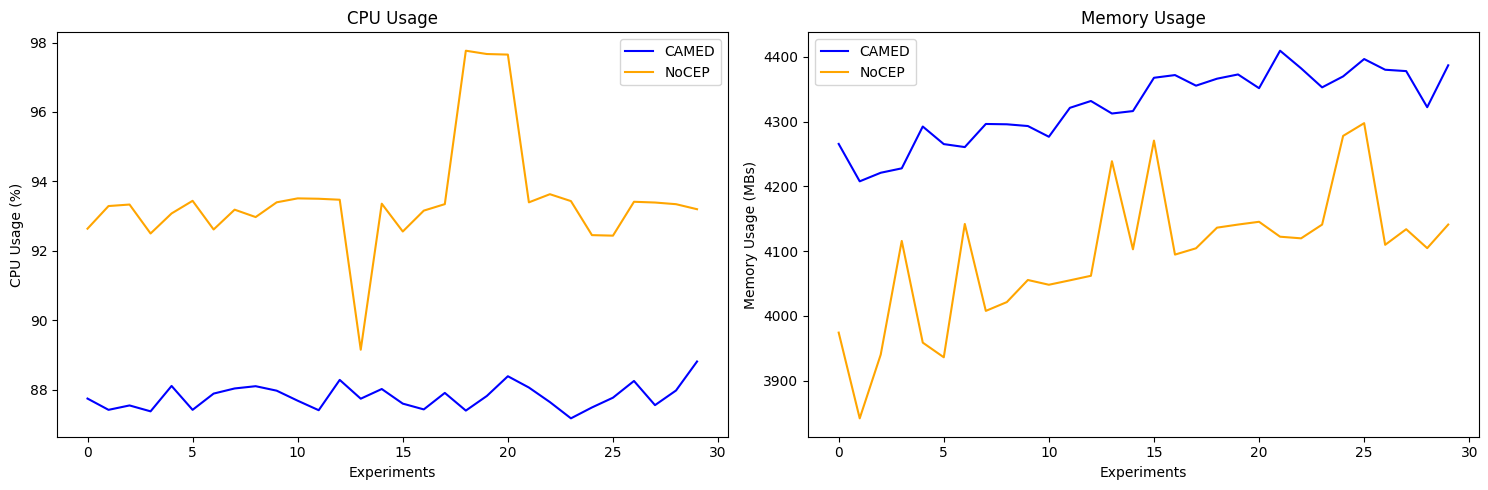

In [32]:
# 1. Basic 2x2 grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].plot(data['cpu_CAMED'], color='blue', label='CAMED')
axes[0].plot(data['cpu_NoCEP'], color='orange', label='NoCEP')
axes[0].set_title('CPU Usage')
axes[0].set_xlabel('Experiments')
axes[0].set_ylabel('CPU Usage (%)')
axes[0].legend()
    
axes[1].plot(data['memory_CAMED'], color='blue', label='CAMED')
axes[1].plot(data['memory_NoCEP'], color='orange', label='NoCEP')
axes[1].set_title('Memory Usage')
axes[1].set_xlabel('Experiments')
axes[1].set_ylabel('Memory Usage (MBs)')
axes[1].legend()

# Adjust layout to prevent titles/labels from overlapping
plt.legend()
plt.tight_layout()
plt.savefig('resources_metrics.png')
plt.show()

## Plotting Model metrics

- Create a figure and a 2x2 grid of subplots (two row, two columns).
- The figsize=(12, 7) argument sets the overall size of the figure.
- 'fig' represents the entire figure.
-'axes' is an array containing the individual subplot objects (axes[0] for the left, axes[1] for the right).

/tmp/ipykernel_59198/625032415.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(221)


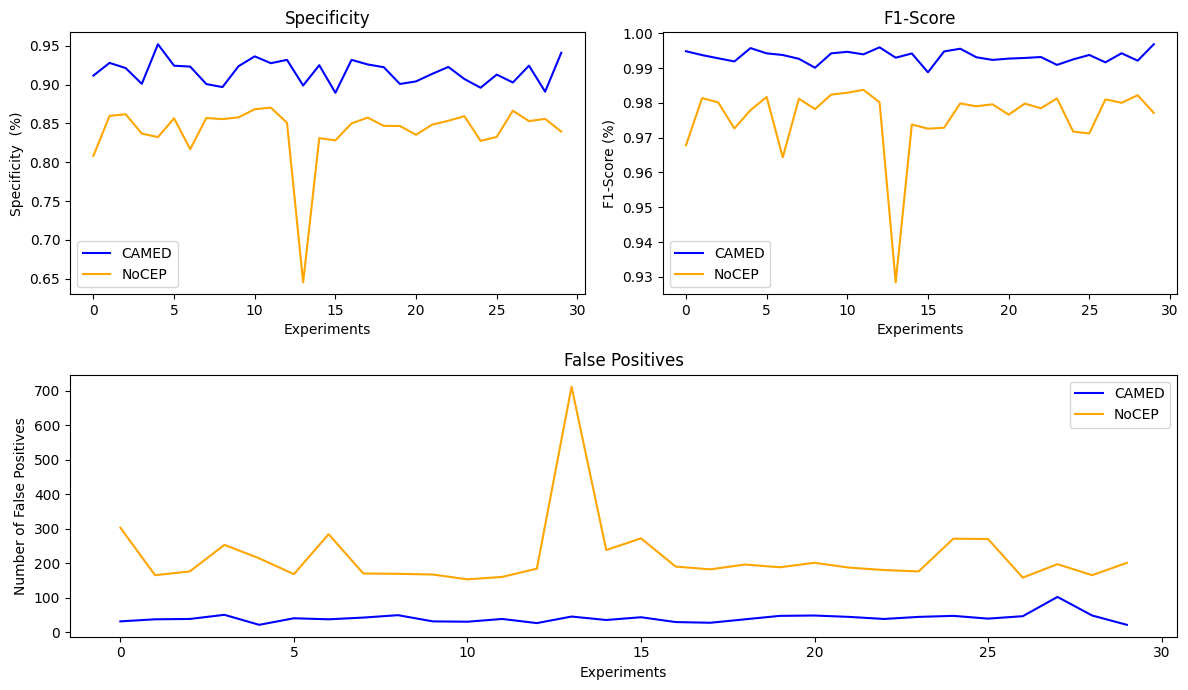

In [36]:
fig, axes = plt.subplots(figsize=(12, 7)) # Define the size of the figure

# Define Specificity plot
ax1 = plt.subplot(221)
ax1.plot(data['specificity_CAMED'], color='blue', label='CAMED')
ax1.plot(data['specificity_NoCEP'], color='orange', label='NoCEP')
ax1.set_title('Specificity')
ax1.set_xlabel('Experiments')
ax1.set_ylabel('Specificity  (%)')
ax1.legend()

# Define F1-score plot
ax2 = plt.subplot(222)   
ax2.plot(data['f1-score_CAMED'], color='blue', label='CAMED')
ax2.plot(data['f1-score_NoCEP'], color='orange', label='NoCEP')
ax2.set_title('F1-Score')
ax2.set_xlabel('Experiments')
ax2.set_ylabel('F1-Score (%)')
ax2.legend()

# Define false positives plot
ax3 = plt.subplot(212)
ax3.plot(data['fp_CAMED'], color='blue', label='CAMED')
ax3.plot(data['fp_NoCEP'], color='orange', label='NoCEP')
ax3.set_title('False Positives')
ax3.set_xlabel('Experiments')
ax3.set_ylabel('Number of False Positives')
ax3.legend()

plt.legend() # Show legend()
plt.tight_layout() # Adjust plot
plt.savefig('metrics.png') # save figure
plt.show()